In [84]:
#Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil
from bioservices import *
!pip install biopython
from Bio import SeqIO, Entrez
from Bio. KEGG.REST import *


In [136]:
#1

import os
import pandas as pd

#Print current working directory and list the files
print(os.getcwd())
print(os.listdir())

#Specify the full path to 'ActionabilityData.txt'
file_path = "C:\\Users\\zkabir\\Downloads\\ActionabilityData.tsv"
actionability_df = pd.read_csv(file_path, delimiter='\t', header=0, dtype=str, low_memory=False) #This would read the actionability file into a pandas dataframa

#Parse the actionability file 
search_term = "NTRK1"
filtered_df = actionability_df[actionability_df['MUTATION_REMARK'].str.contains(search_term, case=False, na=False)] #This would filter rows in the file where the column 'MUTATION REMARK' contains the search term NTRK1

#Create a new file with specified columns
#Save the filtered data to a new CSV file, including the specific columns in the output file
filtered_df.to_csv('filtered_actionability_data.csv', columns=['MUTATION_REMARK', 'GENE', 'DISEASE', 'ACTIONABILITY_RANK', 'DRUG_COMBINATION', 'DEVELOPMENT_STATUS', 'PRIMARY_OUTCOME_MEASURE'], sep='\t', index=False)

#Create a dataframe
filtered_df = pd.read_csv('filtered_actionability_data.csv', sep='\t') #Read the new CSV file into a new Pandas dataframe

print(filtered_df)

C:\Users\zkabir
['.anaconda', '.conda', '.condarc', '.continuum', '.igv', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', 'AppData', 'Application Data', 'Biopython HW Zarifa Kabir.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'filtered_actionability_data.csv', 'Final Project Zarifa Kabir.ipynb', 'Final Project.ipynb', 'FINAL_PROJECT_MAHNOOR_AHMED.ipynb', 'HW 5 Zarifa Kabir.ipynb', 'igv', 'IntelGraphicsProfiles', 'kegg_id_output.txt', 'kegg_output.txt', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'network_annotation.txt', 'ntrk1_sequences.fasta', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{0b734c07-66f8-11ee-bacb-d89ef3429536}.TM.blf', 'NTUSER.DAT{0b734c07-66f8-11ee-bacb-d89ef3429536}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{0b734c07-66f8-11ee-bacb-d89ef3429536}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'pathway_map.xml', 'Pictures', 'PrintHood'

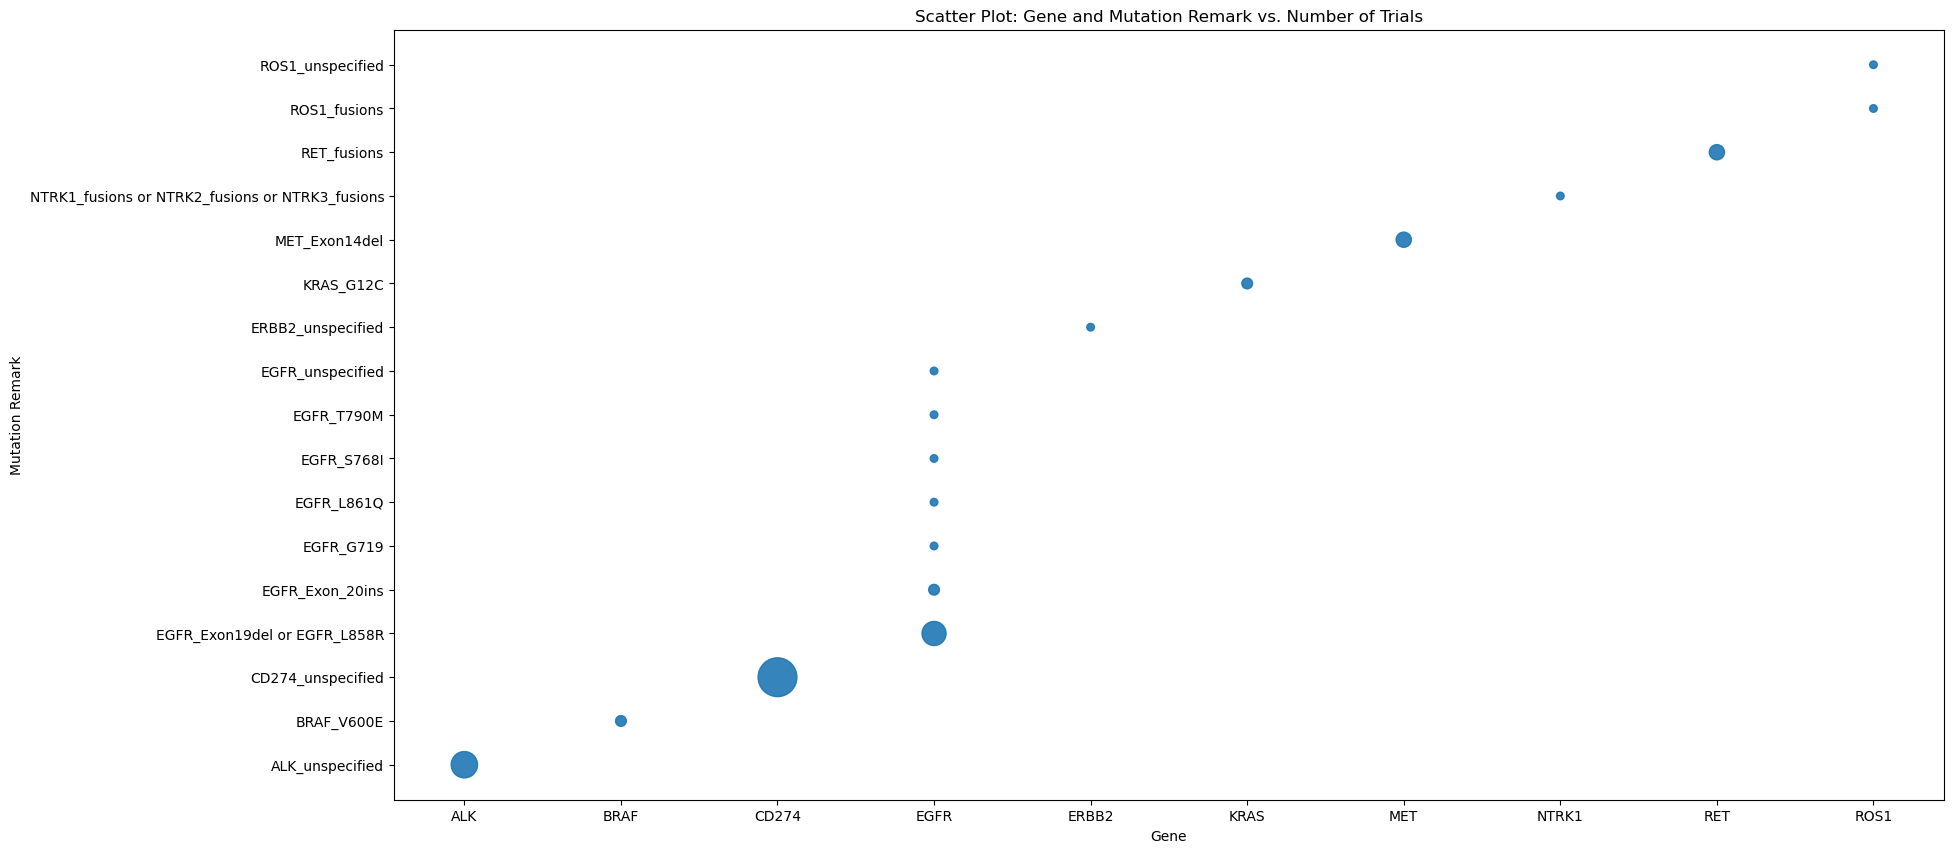

In [156]:
#2

import matplotlib.pyplot as plt

#Group and aggregate data
grouped_data = filtered_df.groupby(['GENE', 'MUTATION_REMARK']).size().reset_index(name='NumTrials')

#Create scatter plot
plt.figure(figsize=(20, 10)) 
plt.scatter(grouped_data['GENE'], grouped_data['MUTATION_REMARK'], s=grouped_data['NumTrials']*30, alpha=0.9) #This will create a scatter plot using the GENE column as the x-axis values and Mutation Remark as y-axis values.0.9 sets the display scale of the plots for better visibillity.  
plt.xlabel('Gene') 
plt.ylabel('Mutation Remark')
plt.title('Scatter Plot: Gene and Mutation Remark vs. Number of Trials')
plt.show()

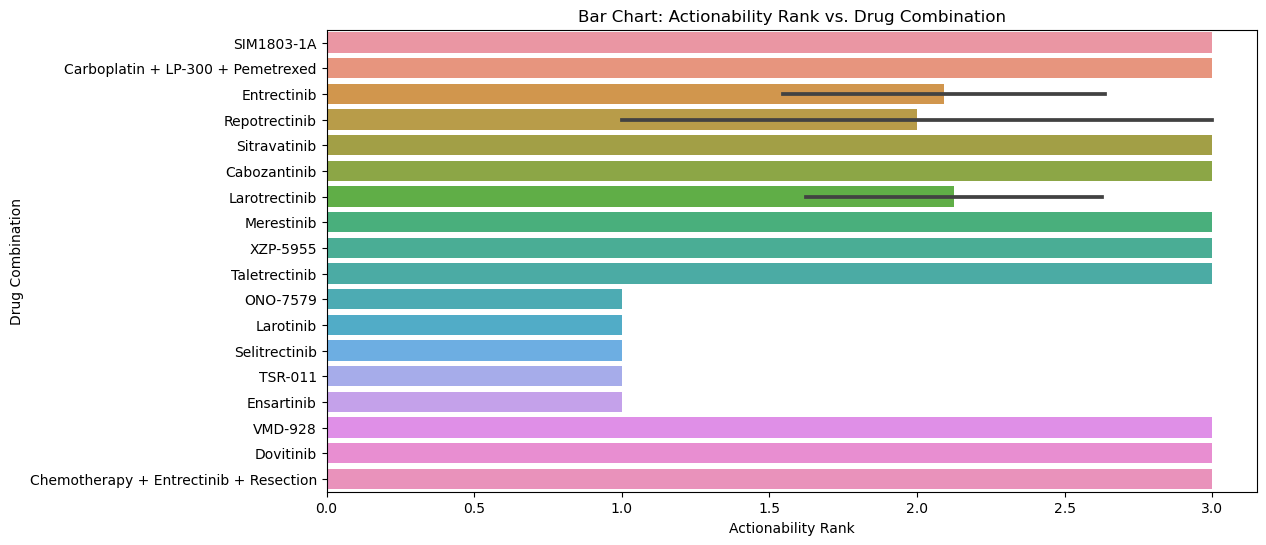

In [82]:
#3

import seaborn as sns

#Create bar chart and set actionability rank as x-axis ad drug combination as y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x='ACTIONABILITY_RANK', y='DRUG_COMBINATION', data=filtered_df) #This will use the data from the parsed filtered file, specifically for my searched term which was NTRK1.
plt.xlabel('Actionability Rank')
plt.ylabel('Drug Combination')
plt.title('Bar Chart: Actionability Rank vs. Drug Combination')
plt.show() #Display the chart


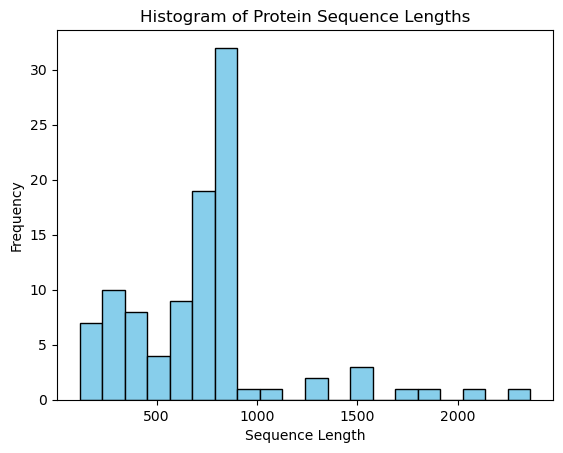

[<http.client.HTTPResponse object at 0x000002CA0529E080>, <http.client.HTTPResponse object at 0x000002CA0529E890>, <http.client.HTTPResponse object at 0x000002CA0529E9B0>, <http.client.HTTPResponse object at 0x000002CA0529E8F0>, <http.client.HTTPResponse object at 0x000002CA04FCFA60>, <http.client.HTTPResponse object at 0x000002CA047359C0>, <http.client.HTTPResponse object at 0x000002CA046B6E00>, <http.client.HTTPResponse object at 0x000002CA04737AF0>, <http.client.HTTPResponse object at 0x000002CA04C31CC0>, <http.client.HTTPResponse object at 0x000002CA04C31600>, <http.client.HTTPResponse object at 0x000002CA0506B160>, <http.client.HTTPResponse object at 0x000002CA05069D50>, <http.client.HTTPResponse object at 0x000002CA0506BD30>, <http.client.HTTPResponse object at 0x000002CA05069DE0>, <http.client.HTTPResponse object at 0x000002CA0506AC80>, <http.client.HTTPResponse object at 0x000002CA0506B400>, <http.client.HTTPResponse object at 0x000002CA0506BC10>, <http.client.HTTPResponse obje

In [157]:
#4

from Bio import Entrez, SeqIO
import pandas as pd
import matplotlib.pyplot as plt

#BioPython Session 
#This session will initiate a BipPython session to search the protein database using the search term NTRK1
def search_protein_database(search_term, max_results=100):
    Entrez.email = 'zmk256@nyu.edu'  # Replace with email
    handle = Entrez.esearch(db='protein', term=search_term, retmax=max_results)
    record = Entrez.read(handle)
    return record['IdList']

#Add the specific search term (NTRK1)
protein_ids = search_protein_database('NTRK1') #This will retrieve a list of protein IDs and store them in protein_ids

#Fetch Sequences from abstract
def fetch_sequences(protein_ids):
    sequences = []
    for protein_id in protein_ids: #for each protein ID, this function will fetch the sequence the database
        handle = Entrez.efetch(db='protein', id=protein_id, rettype='gb', retmode='text')
        record = SeqIO.read(handle, 'genbank') #parse the sequence in genbank format
        sequences.append(record.seq)
    return sequences

protein_sequences = fetch_sequences(protein_ids)

#Create the histogram with the specified x-axis and y-axis
sequence_lengths = [len(seq) for seq in protein_sequences]
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black') #I chose random colors. bins=20 sets the visibility and transparency of the bars on the bar graph
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Protein Sequence Lengths')
plt.show()

#Load the PubMed References into a DataFrame
def fetch_pubmed_references(search_term, max_results=100):
    handle = Entrez.esearch(db='pubmed', term=search_term, retmax=max_results)
    record = Entrez.read(handle)
    pmid_list = record['IdList'] #Search PubMed for articles related to NTRK1 and retrieve a list of IDs

    references = []
    for pmid in pmid_list:
        pubmed_record = Entrez.efetch(db='pubmed', id=pmid, retmode='xml') #for each ID, the corresponding article will be fetched in XML format
        references.append(pubmed_record)

    return references

#Add the search term
pubmed_references = fetch_pubmed_references('NTRK1')

print(pubmed_references)


In [158]:
#5

from bioservices import KEGG

#Create a bioservices KEGG session
k = KEGG()

#Specify the disease name associated with the gene
search_term = 'thyroid cancer'
result = kegg_session.find('disease', search_term)

#Capture the output based on the ID
kegg_id = result.split('\n')[0].split('\t')[0]

print(result)

#Write the output to a file
with open('kegg_output.txt', 'w') as f:
    f.write(result)


ds:H00032	Thyroid cancer
ds:H01592	Medullary thyroid cancer



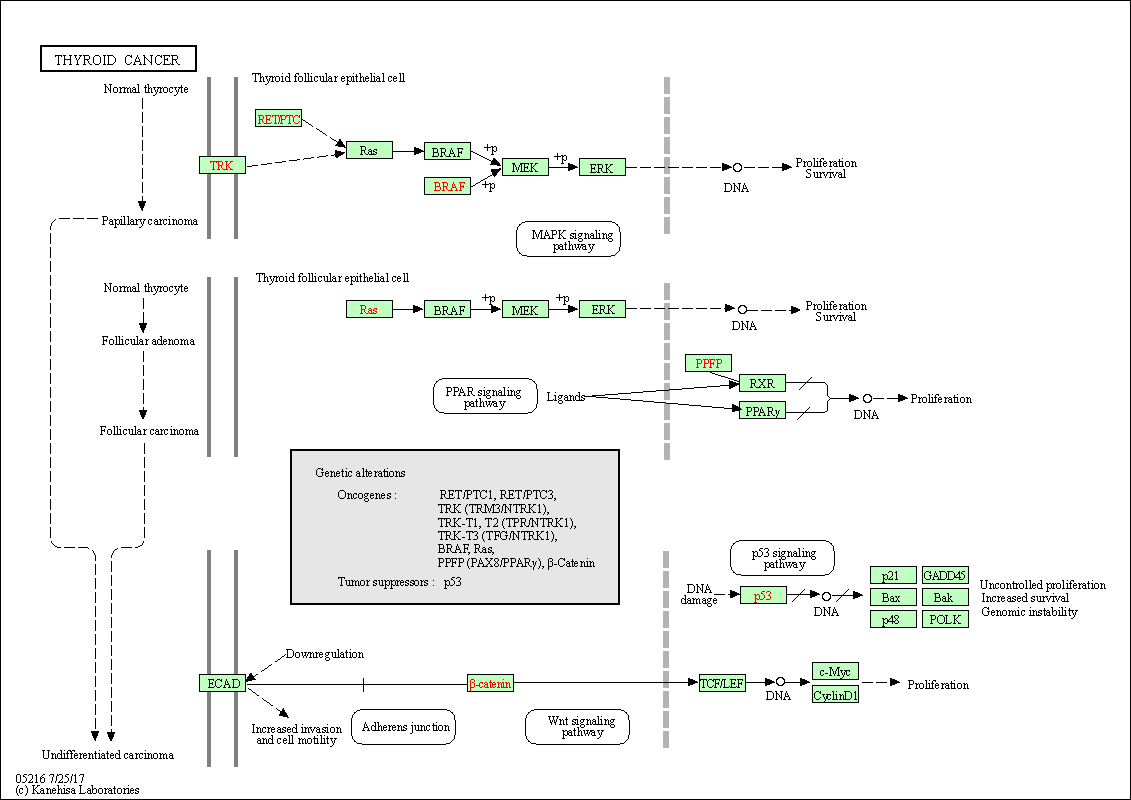

In [140]:
#5 continuation
#I was assigned a gene which did not have a specific pathway. Therefore, I chose a disease which is involved in the manipulation of the gene and printed its pathway map. The pathway has NTRK1/TRKA presence.

from bioservices import KEGG
from IPython.display import Image

k = KEGG()

pathway_id = "hsa05216" #list down the specific hsa code from the website
Image(k.get(pathway_id, "image")) #print the pathway map

In [102]:
#6

from bioservices import UniProt
import pandas as pd
import io  #This will import io module directly

#Create a Bioservices UniProt object
u = UniProt()

#Perform a search query for the protein name
search_query = "protein_name:TRKA AND organism_name:'Homo sapiens'" #I went to UniProt and found TRKA as a general protein that is encoded by NTRK1. 
result = u.search(search_query, frmt="tsv") #This will search the protein under humans in UniProt

#Create a DataFrame from the result above
df_uniprot = pd.read_csv(io.StringIO(result), sep='\t')

#Print the DataFrame
print(df_uniprot.head())


    Entry   Entry Name  Reviewed  \
0  P04629  NTRK1_HUMAN  reviewed   
1  A7KAX9  RHG32_HUMAN  reviewed   

                                       Protein names  \
0  High affinity nerve growth factor receptor (EC...   
1  Rho GTPase-activating protein 32 (Brain-specif...   

                    Gene Names              Organism  Length  
0           NTRK1 MTC TRK TRKA  Homo sapiens (Human)     796  
1  ARHGAP32 GRIT KIAA0712 RICS  Homo sapiens (Human)    2087  


In [162]:
#7

from bioservices import UniProt
import pandas as pd
import io #This will import io module directly

#Create a Bioservices UniProt object
u = UniProt()

#Perform a search query specifying NTRK1 and seeking comments regarding the disease I focused on
search_query = "family:'NTRK1' AND comment(thyroid_cancer)" #I could not find a protein family for my gene so I used the gene itself as family. 
result = u.search(search_query, frmt="tsv") #This would obtain the result in a tsv format

#Create a DataFrame from the result
df_uniprot_trka_disease = pd.read_csv(io.StringIO(result), sep='\t') #This would read the tsv formatted result into a Pandas dataframe

#Display the DataFrame
print(df_uniprot_trka_disease.head())



Empty DataFrame
Columns: [Entry, Entry Name, Reviewed, Protein names, Gene Names, Organism, Length]
Index: []


In [167]:
#8

from Bio import Entrez, SeqIO

def get_human_fasta_sequences (search_term, output_file):
    Entrez.email = 'zmk256@nyu.edu' #Replace with my own email address
    
    #Perform a bioython search
    search_term = "NTRK1" #Use the assigned search term
    output_file_name = 'output_sequences_fasta' #Rename the output file
    handle = Entrez.esearch(db='protein', term=f'{search_term} AND organism:human,', retmax=100)
    result = Entrez.read(handle)
    
    if 'IdList' in result:
        #Retrieve the fasta sequence and save it to the output file
        with open(output_file, 'w') as f:
            for record_id in result['IdList']:
                fasta_handle = Entrez.efetch(db='protein', id=record_id, rettype='fasta', retmode='text')
                
        print(f"Fasta sequences saved to {output_file}")
    else:
        print(f"No results found for the search term: {search_term}")

get_human_fasta_sequences(search_term, output_file_name)


Fasta sequences saved to output_sequences_fasta


In [128]:
#9

from Bio import Entrez

def search_gefitinib(query_term='Gefitinib'): #Define the named function which takes a query term to search PubMed
    #Add my email address
    Entrez.email = "zmk256@nyu.edu"

    #Perform a search using the provided query term
    handle = Entrez.esearch(db="pubmed", term=query_term) #Use Entrez to perform a search in the PubMed datbase with the query term
    record = Entrez.read(handle)

    #Close the search handle to release the resources
    handle.close()

    # Return the PubMed IDs (PMIDs) of the search results
    return record['IdList']

gefitinib_pmids = search_gefitinib()
print("PubMed IDs related to Gefitinib:", gefitinib_pmids)


PubMed IDs related to Gefitinib: ['38112449', '38107172', '38101609', '38100532', '38097606', '38092263', '38090376', '38085693', '38075671', '38046236', '38035001', '38033496', '38032449', '38021444', '38021095', '38018431', '38016250', '38012958', '38010260', '38009559']


In [142]:
#10

import pandas as pd

#Use the actionability file path from before
actionability_file_path = "C:\\Users\\zkabir\\Downloads\\ActionabilityData.tsv"

#Read the actionability file into a DataFrame
actionability_df = pd.read_csv(actionability_file_path, delimiter='\t')

#Filter data based on the condition from the actionability file
#I substituted the columns of the new file with the name of the columns from the actionability file. 
filtered_df = actionability_df[actionability_df['DEVELOPMENT_STATUS'].str.contains('Approved FDA') &
                               actionability_df['DISEASE'].str.contains('lung') &
                               actionability_df['DISEASE'].str.contains('carcinoma') &
                               actionability_df['DISEASE'].str.contains('non small cell carcinoma')]

#Create a new DataFrame with the specified columns
new_df = filtered_df[['GENE', 'DISEASE', 'DRUG_COMBINATION', 'MUTATION_REMARK', 'PRIMARY_OUTCOME_MEASURE']]

#Print the new DataFrame
print(new_df)


      GENE                                      DISEASE DRUG_COMBINATION  \
282    ALK  lung / carcinoma / non small cell carcinoma       Crizotinib   
283    ALK  lung / carcinoma / non small cell carcinoma       Brigatinib   
284    ALK  lung / carcinoma / non small cell carcinoma       Brigatinib   
285    ALK  lung / carcinoma / non small cell carcinoma       Brigatinib   
286    ALK  lung / carcinoma / non small cell carcinoma        Alectinib   
...    ...                                          ...              ...   
8786   RET  lung / carcinoma / non small cell carcinoma    Selpercatinib   
8787   RET  lung / carcinoma / non small cell carcinoma    Selpercatinib   
8788   RET  lung / carcinoma / non small cell carcinoma      Pralsetinib   
8876  ROS1  lung / carcinoma / non small cell carcinoma       Crizotinib   
8901  ROS1  lung / carcinoma / non small cell carcinoma      Entrectinib   

       MUTATION_REMARK    PRIMARY_OUTCOME_MEASURE  
282    ALK_unspecified  Progression

C:\Users\zkabir\AppData\Local\Temp\ipykernel_15036\526237954.py:10: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  actionability_df = pd.read_csv(actionability_file_path, delimiter='\t')


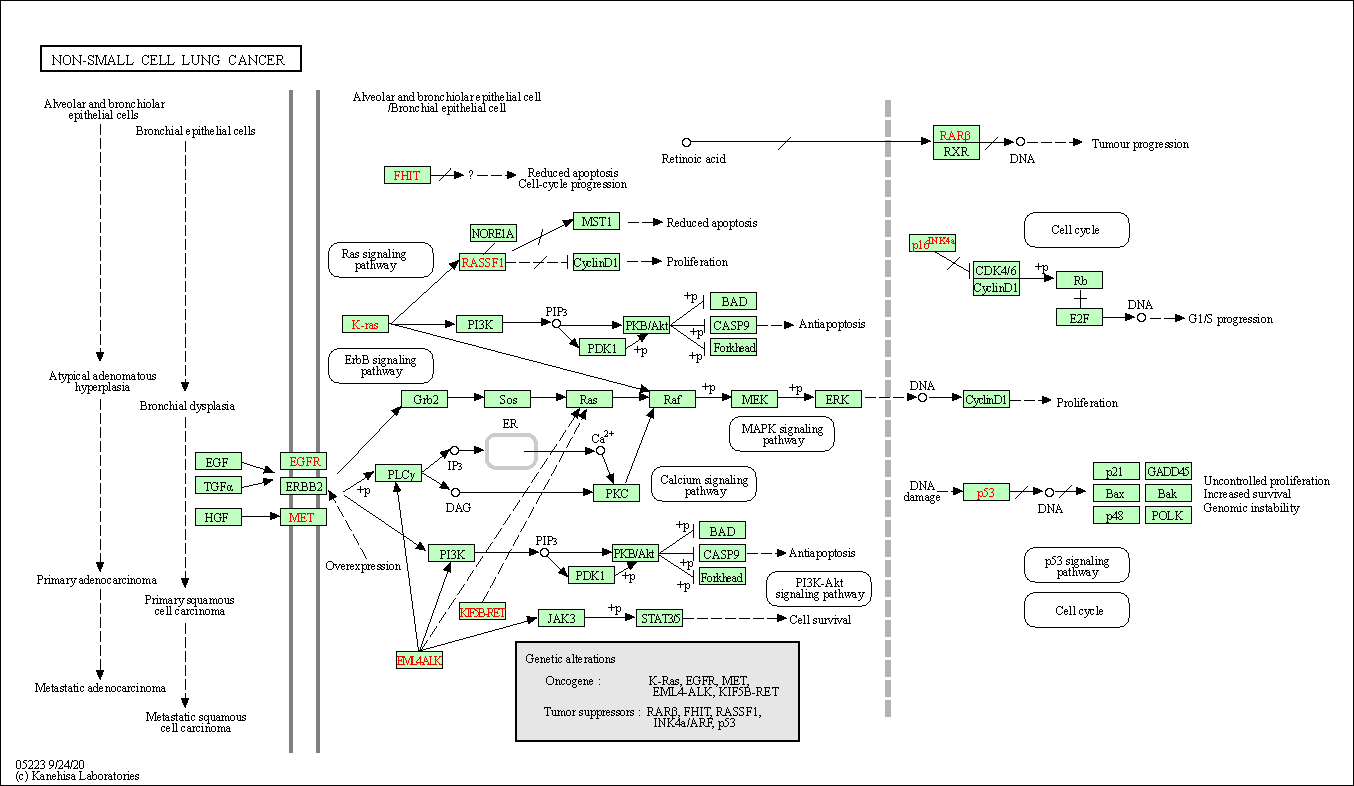

In [141]:
#10 continuation

from bioservices import KEGG
from IPython.display import Image

k = KEGG()

pathway_id = "hsa05223"
Image(k.get(pathway_id, "image"))


In [ ]:
#Summary

#For this project, I started by setting up the necessary libraries and organizing the project files. 
#I parsed the actionability file, focusing on my search term, NTRK1, and created the new dataset called filtered_df into a new CSV file containing the relevant columns. 
#Then, I generated visualization charts, including scatterplots, bar graphs, and histograms, to illustrate the relationship between specific columns as asked in the project.
#After initiating the BioPython session to search the database for NTRK1 and fetch fasta sequences and retrieve PubMed references. 
#Next, I used bioservices to access KEGG and UniProt databases to retrieve specific information, including pathways, protein names,and family domain names for my assigned search term.   